In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.shape

(19158, 13)

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [11]:
data=[cols for cols in df.columns if df[cols].isnull().mean()*100 < 5 and df[cols].isnull().mean()*100 > 0 ]
data

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [15]:
df[data].isnull().mean()*100

city_development_index    2.500261
enrolled_university       2.014824
education_level           2.401086
experience                0.339284
training_hours            3.998330
dtype: float64

In [16]:
df[data].isnull().sum()

city_development_index    479
enrolled_university       386
education_level           460
experience                 65
training_hours            766
dtype: int64

In [26]:
df[data].dtypes

city_development_index    float64
enrolled_university        object
education_level            object
experience                float64
training_hours            float64
dtype: object

In [64]:
sum=0
count=0
for col in data:
    x=len(df[col].dropna())/len(df)
    sum=sum+x
    count += 1
    print(f"{col}: {x*100}")
  

city_development_index: 97.499739012423
enrolled_university: 97.98517590562689
education_level: 97.59891429167972
experience: 99.66071614991127
training_hours: 96.00167032049275


In [66]:
y=len(df[data].dropna())/len(df)

In [72]:

print(f"We are lossing {(1-y)*100:.2f} % rows")

We are lossing 10.31 % rows


In [73]:
new_df=df[data].dropna()

In [75]:
new_df.shape,df.shape

((17182, 5), (19158, 13))

<Axes: ylabel='Density'>

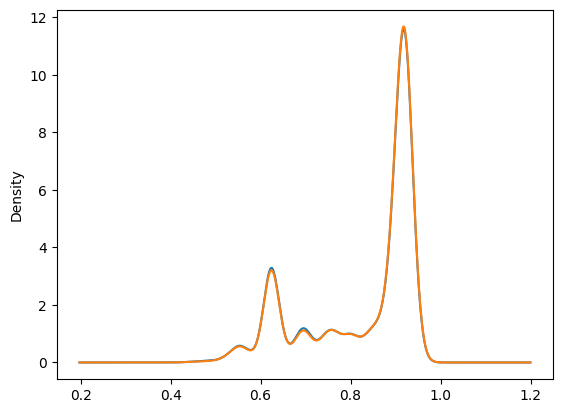

In [77]:
df['city_development_index'].plot(kind='kde')
new_df['city_development_index'].plot(kind='kde')

<Axes: ylabel='Frequency'>

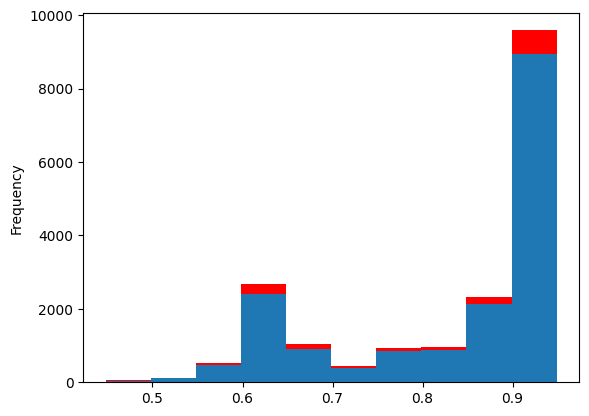

In [95]:
df['city_development_index'].plot(kind='hist',color='red')
new_df['city_development_index'].plot(kind='hist')

<Axes: ylabel='Density'>

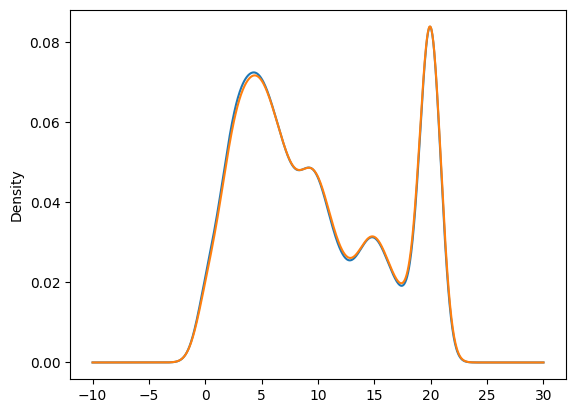

In [78]:
df['experience'].plot(kind='kde')
new_df['experience'].plot(kind='kde')

<Axes: ylabel='Frequency'>

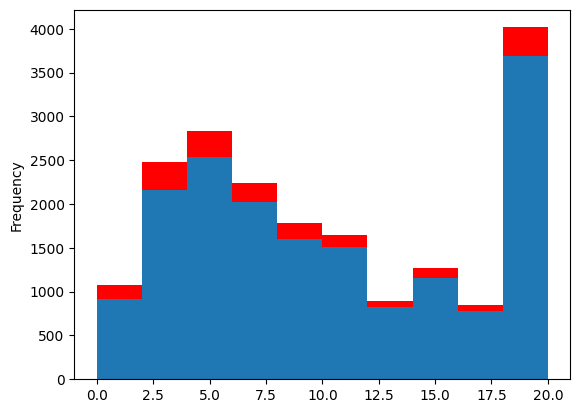

In [94]:
df['experience'].plot(kind='hist',color='red')
new_df['experience'].plot(kind='hist')

<Axes: ylabel='Density'>

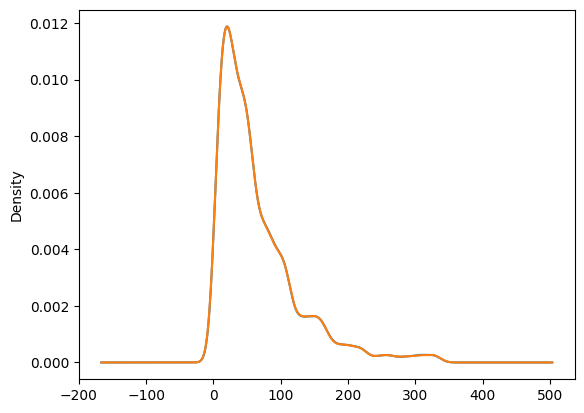

In [79]:
df['training_hours'].plot(kind='kde')
new_df['training_hours'].plot(kind='kde')

<Axes: ylabel='Frequency'>

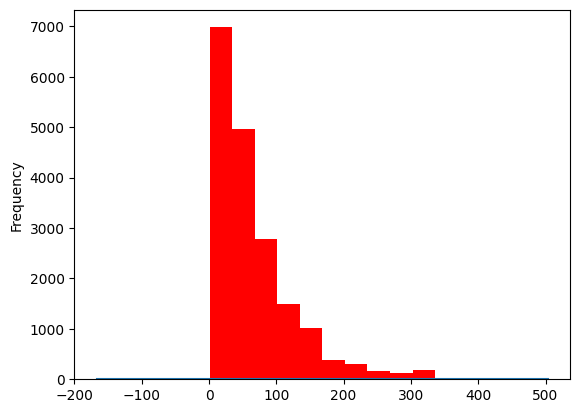

In [97]:

df['training_hours'].plot(kind='hist',color='red')
new_df['training_hours'].plot(kind='kde')

# Let's check for categorical data

In [82]:
difference=pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1) 

difference.columns=['BeforeCCA','AfterCCA']
difference

,BeforeCCA,AfterCCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [83]:
difference2=pd.concat([
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
],axis=1) 

difference2.columns=['BeforeCCA','AfterCCA']
difference2

,BeforeCCA,AfterCCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


<Axes: xlabel='enrolled_university'>

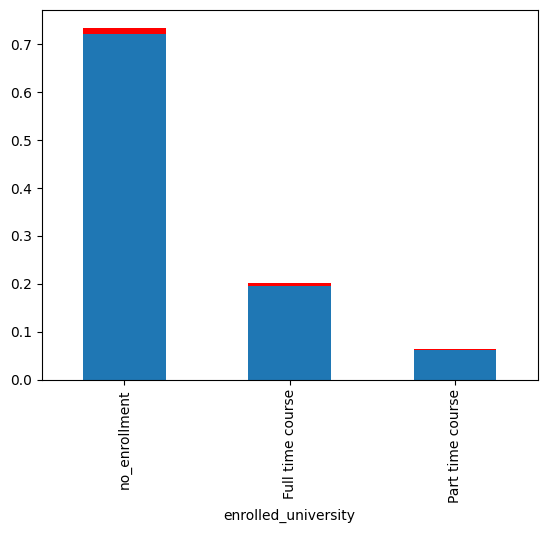

In [90]:
difference['AfterCCA'].plot(kind='bar',color='red')
difference['BeforeCCA'].plot(kind='bar')

# Finally we can say the data was random missing if we look at the visuals and tables
# It indicates that peforming CCA is not bad option for this dataset 
# But keep in mind we are losing more than 10% rows if the dataset is small than it's the matter of concern 
# For Big Dataset CCA makes sense here